# ÏÇ¨ÏßÑ Í∞ÄÏßÄÍ≥† Ïò§Í∏∞

ÏÇ¨Ïö©Ìï† ÎîîÎ†âÌÑ∞Î¶¨ Íµ¨Ï°∞

- aiffel/human_segmentation
    ‚îú‚îÄ‚îÄ models
        ‚îî‚îÄ‚îÄ deeplabv3_xception_tf_dim_ordering_tf_kernels.h5 (ÎØ∏Î¶¨ Ï§ÄÎπÑÌï† ÌïÑÏöîÎäî ÏóÜÏäµÎãàÎã§)
    ‚îú‚îÄ‚îÄ images
        ‚îî‚îÄ‚îÄ my_image.png   (ÏÇ¨ÏßÑ Ïù¥Î¶ÑÏùÄ Í∞ÅÏûê ÌååÏùºÎ™ÖÏóê Îî∞Îùº Îã§Î•¥Í≤å ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§)

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('Ìù¨Ìù¨')

Ìù¨Ìù¨


ÏÇ¨ÏßÑÏ§ÄÎπÑ

(960, 1440, 3)


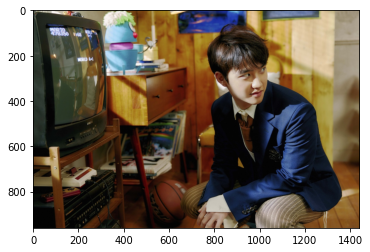

In [2]:
# Î≥∏Ïù∏Ïù¥ ÏÑ†ÌÉùÌïú Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°úÏóê ÎßûÍ≤å Î∞îÍøî Ï£ºÏÑ∏Ïöî.
# Ïù¥ÎØ∏ÏßÄÌååÏùº ÌôïÏû•ÏûêÎ™Ö Ï£ºÏùò‚ùó
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.jpg'
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

**DeepLab Î™®Îç∏ Ï§ÄÎπÑ**

**PixelLibÏóêÏÑú Ï†úÍ≥µÌï¥ Ï£ºÎäî Î™®Îç∏ÏùÑ Îã§Ïö¥Î°úÎìú**

In [3]:
# Ï†ÄÏû•Ìï† ÌååÏùº Ïù¥Î¶ÑÏùÑ Í≤∞Ï†ïÌï©ÎãàÎã§
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLibÍ∞Ä Ï†úÍ≥µÌïòÎäî Î™®Îç∏Ïùò urlÏûÖÎãàÎã§
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# Îã§Ïö¥Î°úÎìúÎ•º ÏãúÏûëÌï©ÎãàÎã§
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fb1303a2100>)

Îã§Ïö¥Î°úÎìúÌïú Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìï¥ **PixelLib**Î°ú Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©Ìï† ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò Î™®Îç∏ÏùÑ ÏÉùÏÑ±

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

**Î™®Îç∏Ïóê Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•**

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path)

PASCAL VOC Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤® Ï¢ÖÎ•ò üîΩ

In [6]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

Î™®Îç∏ÏóêÏÑú ÎÇòÏò® Ï∂úÎ†•Í∞íÏùÑ ÏÇ¥Ïßù ÏÇ¥Ìé¥Î≥¥Í∏∞üòâ

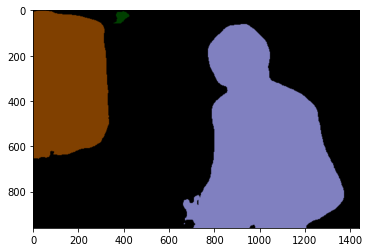

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0, 15, 16, 20]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
pottedplant
tv


outputÏóêÎäî ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖòÏù¥ Îêú Í≤∞Í≥ºÍ∞Ä Í∞ÅÍ∞Å Îã§Î•∏ ÏÉâÏÉÅÏúºÎ°ú Îã¥Í≤® ÏûàÎã§.

segvaluesÏóêÎäî class_idsÏôÄ masksÍ∞Ä ÏûàÍ≥†, class_idsÎ•º ÌÜµÌï¥ Ïñ¥Îñ§ Î¨ºÏ≤¥Í∞Ä Îã¥Í≤® ÏûàÎäîÏßÄ Ïïå Ïàò ÏûàÎã§.

Ïù¥Ï†ú Î¨ºÏ≤¥ÎßàÎã§ outputÏóê Ïñ¥Îñ§ ÏÉâÏÉÅÏúºÎ°ú ÎÇòÌÉÄÎÇò ÏûàÎäîÏßÄÎßå ÏïåÏïÑÎÇ¥Î©¥ Îê† Í≤É Í∞ôÏïÑüòé

In [10]:
# ÏïÑÎûò ÏΩîÎìúÎ•º Ïù¥Ìï¥ÌïòÏßÄ ÏïäÏïÑÎèÑ Ï¢ãÏäµÎãàÎã§
# PixelLibÏóêÏÑú Í∑∏ÎåÄÎ°ú Í∞ÄÏ†∏Ïò® ÏΩîÎìúÏûÖÎãàÎã§
# Ï£ºÎ™©Ìï¥Ïïº Ìï† Í≤ÉÏùÄ ÏÉùÏÉÅ ÏΩîÎìú Í≤∞Í≥ºÎ¨ºÏù¥ÏòàÏöî!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

PixelLibÏóê Îî∞Î•¥Î©¥ ÏúÑÏôÄ Í∞ôÏùÄ ÏÉâÏùÑ ÏÇ¨Ïö©ÌñàÎã§Í≥† ÎÇòÏò®Îã§.

Í∑∏Îüº ÏÇ¨ÎûåÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 15Î≤àÏß∏ ÏÉâÏÉÅÏùÄ Î≠òÍπå?

In [11]:
colormap[15]

array([192, 128, 128])

ÏÇ¨Îûå Ïô∏ÏóêÎèÑ Îã§Î•∏ Î¨ºÏ≤¥Î•º Ï∞æÏïÑÎÇ¥Í≥† Ïã∂Îã§Î©¥ colormap[class_id]Ï≤òÎüº Ï∞æÏïÑÎÇº Ïàò ÏûàÎã§.

Ïó¨Í∏∞ÏÑú Ï£ºÏùòÌï† Í≤ÉÏùÄ output Ïù¥ÎØ∏ÏßÄÍ∞Ä BGR ÏàúÏÑúÎ°ú Ï±ÑÎÑê Î∞∞ÏπòÍ∞Ä ÎêòÏñ¥ ÏûàÎã§Îäî Ï†ê, colormapÏùÄ RGB ÏàúÏÑúÏù¥Îã§‚ùó

Í∑∏Îü¨Îãà Ïö∞Î¶¨Í∞Ä Ï∂îÏ∂úÌï¥Ïïº ÌïòÎäî ÏÉâÏÉÅ Í∞íÏùÄ ÏàúÏÑúÎ•º ÏïÑÎûòÏ≤òÎüº Î∞îÍøî Ï§òÏïºÌïúÎã§.

In [12]:
seg_color = (128,128,192)

Ïù¥Ï†ú seg_colorÎ°úÎßå Ïù¥Î£®Ïñ¥ÏßÑ ÎßàÏä§ÌÅ¨Î•º ÎßåÎì§Ïñ¥ Î≥¥Ïûê

(960, 1440)


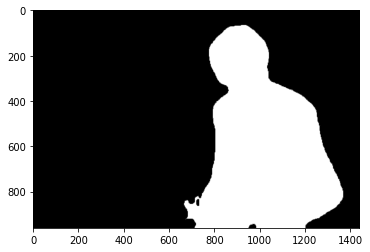

In [13]:
# outputÏùò ÌîΩÏÖÄ Î≥ÑÎ°ú ÏÉâÏÉÅÏù¥ seg_colorÏôÄ Í∞ôÎã§Î©¥ 1(True), Îã§Î•¥Îã§Î©¥ 0(False)Ïù¥ Îê©ÎãàÎã§
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

3Ï±ÑÎÑê Í∞ÄÏ°åÎçò ÏõêÎ≥∏Í≥ºÎäî Îã§Î•¥Í≤å Ï±ÑÎÑê Ï†ïÎ≥¥Í∞Ä ÏÇ¨ÎùºÏ°åÍ≥†,

ÏïÑÎûòÏ≤òÎüº Î¨ºÏ≤¥Í∞Ä ÏûàÎäî ÏúÑÏπòÎäî 1(True), Í∑∏ Ïô∏ÏóêÎäî 0(False)Ïù∏ Î∞∞Ïó¥Ïù¥ ÎêòÏóàÎã§.

ÏõêÎûò Ïù¥ÎØ∏ÏßÄÏôÄ Í≤πÏ≥ê Î≥¥Î©¥ ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖòÏù¥ ÏñºÎßàÎÇò Ïûò ÎêòÏóàÎäîÏßÄ ÏïåÏïÑÎ≥¥Í∏∞ ÏâΩÎã§.üòÅ

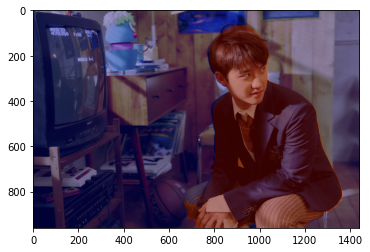

In [14]:
img_show = img_orig.copy()

# TrueÍ≥º FalseÏù∏ Í∞íÏùÑ Í∞ÅÍ∞Å 255Í≥º 0ÏúºÎ°ú Î∞îÍøîÏ§çÎãàÎã§
img_mask = seg_map.astype(np.uint8) * 255

# 255ÏôÄ 0ÏùÑ Ï†ÅÎãπÌïú ÏÉâÏÉÅÏúºÎ°ú Î∞îÍøîÎ¥ÖÎãàÎã§
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§Ìä∏Î•º Ï†ÅÎãπÌûà Ìï©Ï≥êÎ¥ÖÎãàÎã§
# 0.6Í≥º 0.4Îäî Îëê Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÎäî ÎπÑÏú®ÏûÖÎãàÎã§.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# Î∞∞Í≤Ω ÌùêÎ¶¨Í≤å ÎßåÎì§Í∏∞

**blur()** Ìï®Ïàò Ïù¥Ïö©

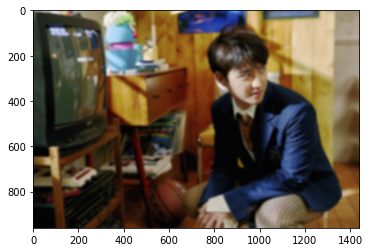

In [15]:
# (13,13)ÏùÄ blurring kernel sizeÎ•º ÎúªÌï©ÎãàÎã§
# Îã§ÏñëÌïòÍ≤å Î∞îÍøîÎ≥¥ÏÑ∏Ïöî
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

ÌùêÎ†§ÏßÑ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨Î•º Ïù¥Ïö©Ìï¥ÏÑú Î∞∞Í≤ΩÎßå Ï∂îÏ∂ú

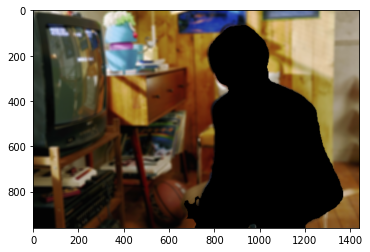

In [16]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# Î∞∞Í≤Ω ÏòÅÏÉÅÍ≥º ÏÇ¨Îûå ÏòÅÏÉÅ Ìï©ÏπòÍ∏∞

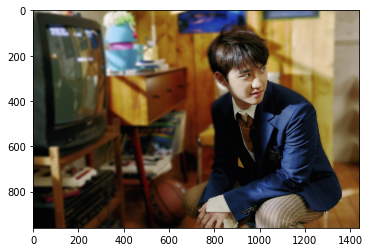

In [17]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

ÏÇ¨ÏßÑÍ∏∞Ï§Ä Ïò§Î•∏Ï™Ω ÌåîÏù¥ Î∏îÎü¨Ï≤òÎ¶¨ ÎêòÏóàÏùå

# Í≥†ÏñëÏù¥ ÏÇ¨ÏßÑ

(1080, 1440, 3)


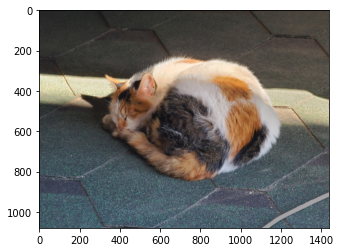

In [18]:
# Î≥∏Ïù∏Ïù¥ ÏÑ†ÌÉùÌïú Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°úÏóê ÎßûÍ≤å Î∞îÍøî Ï£ºÏÑ∏Ïöî.
# Ïù¥ÎØ∏ÏßÄÌååÏùº ÌôïÏû•ÏûêÎ™Ö Ï£ºÏùò‚ùó
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/Í≥†ÏñëÏù¥.jpg'
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

PixelLibÏóêÏÑú Î™®Îç∏ Îã§Ïö¥Î°úÎìú

In [19]:
# Ï†ÄÏû•Ìï† ÌååÏùº Ïù¥Î¶ÑÏùÑ Í≤∞Ï†ïÌï©ÎãàÎã§
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLibÍ∞Ä Ï†úÍ≥µÌïòÎäî Î™®Îç∏Ïùò urlÏûÖÎãàÎã§
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# Îã§Ïö¥Î°úÎìúÎ•º ÏãúÏûëÌï©ÎãàÎã§
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fb0d68ae1c0>)

**PixelLib**Î°ú Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©Ìï† ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò Î™®Îç∏ÏùÑ ÏÉùÏÑ±

In [20]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

Î™®Îç∏ Ïù¥ÎØ∏ÏßÄ ÏûÖÎ†•

In [21]:
segvalues, output = model.segmentAsPascalvoc(img_path)

PASCAL VOC Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤® Ï¢ÖÎ•ò

In [22]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

Î™®Îç∏ÏóêÏÑú ÎÇòÏò® Ï∂úÎ†•Í∞í ÏÇ¥Ìé¥Î≥¥Í∏∞

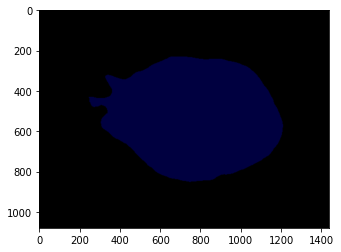

In [23]:
plt.imshow(output)
plt.show()

In [24]:
segvalues

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [25]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


Î¨ºÏ≤¥ÎßàÎã§ outputÏóê Ïñ¥Îñ§ ÏÉâÏÉÅÏúºÎ°ú ÎÇòÌÉÄÎÇò ÏûàÎäîÏßÄ ÌôïÏù∏

In [26]:
# ÏïÑÎûò ÏΩîÎìúÎ•º Ïù¥Ìï¥ÌïòÏßÄ ÏïäÏïÑÎèÑ Ï¢ãÏäµÎãàÎã§
# PixelLibÏóêÏÑú Í∑∏ÎåÄÎ°ú Í∞ÄÏ†∏Ïò® ÏΩîÎìúÏûÖÎãàÎã§
# Ï£ºÎ™©Ìï¥Ïïº Ìï† Í≤ÉÏùÄ ÏÉùÏÉÅ ÏΩîÎìú Í≤∞Í≥ºÎ¨ºÏù¥ÏòàÏöî!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [27]:
# Í≥†ÏñëÏù¥Î•º ÎÇòÌÉÄÎÇ¥Îäî 8Î≤àÏß∏ ÏÉâÏÉÅ
colormap[8]

array([64,  0,  0])

In [28]:
seg_color = (0,0,64)

seg_colorÎ°úÎßå Ïù¥Î£®Ïñ¥ÏßÑ ÎßàÏä§ÌÅ¨ ÎßåÎì§Í∏∞

(1080, 1440)


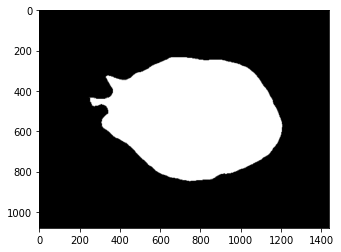

In [29]:
# outputÏùò ÌîΩÏÖÄ Î≥ÑÎ°ú ÏÉâÏÉÅÏù¥ seg_colorÏôÄ Í∞ôÎã§Î©¥ 1(True), Îã§Î•¥Îã§Î©¥ 0(False)Ïù¥ Îê©ÎãàÎã§
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

Ïôú... ÌùëÎ∞±Îßå ÎÇòÏò§ÏßÄ?

‚ñ∂ ÏΩîÎìúÎ•º ÏûòÎ™ª ÏûÖÎ†•ÌñàÏóàÏùå

ÏõêÎûò Ïù¥ÎØ∏ÏßÄÏôÄ Í≤πÏ≥êÏÑú ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖòÏù¥ ÏñºÎßàÎÇò Ïûò ÎêòÏóàÎäîÏßÄ ÌôïÏù∏

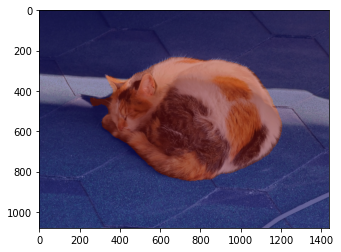

In [30]:
img_show = img_orig.copy()

# TrueÍ≥º FalseÏù∏ Í∞íÏùÑ Í∞ÅÍ∞Å 255Í≥º 0ÏúºÎ°ú Î∞îÍøîÏ§çÎãàÎã§
img_mask = seg_map.astype(np.uint8) * 255

# 255ÏôÄ 0ÏùÑ Ï†ÅÎãπÌïú ÏÉâÏÉÅÏúºÎ°ú Î∞îÍøîÎ¥ÖÎãàÎã§
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§Ìä∏Î•º Ï†ÅÎãπÌûà Ìï©Ï≥êÎ¥ÖÎãàÎã§
# 0.6Í≥º 0.4Îäî Îëê Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÎäî ÎπÑÏú®ÏûÖÎãàÎã§.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# Î∞∞Í≤Ω ÌùêÎ¶¨Í≤å ÎßåÎì§Í∏∞

**blur()** Ìï®Ïàò Ïù¥Ïö©

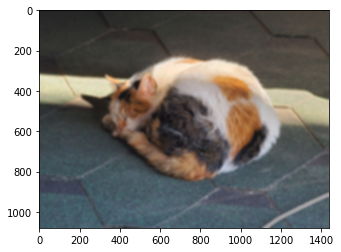

In [31]:
# (15,15)ÏùÄ blurring kernel sizeÎ•º ÎúªÌï©ÎãàÎã§
# Îã§ÏñëÌïòÍ≤å Î∞îÍøîÎ≥¥ÏÑ∏Ïöî
img_orig_blur = cv2.blur(img_orig, (15,15))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

ÌùêÎ†§ÏßÑ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨Î•º Ïù¥Ïö©Ìï¥ÏÑú Î∞∞Í≤ΩÎßå Ï∂îÏ∂ú

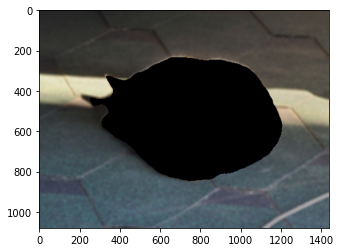

In [32]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# Î∞∞Í≤Ω ÏòÅÏÉÅÍ≥º Í≥†ÏñëÏù¥ ÏòÅÏÉÅ Ìï©ÏπòÍ∏∞

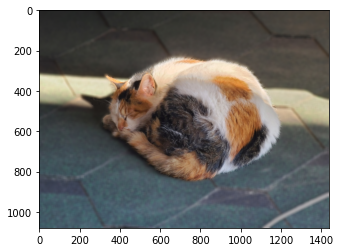

In [33]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# Î∞∞Í≤ΩÏ†ÑÌôò ÌÅ¨Î°úÎßàÌÇ§

In [34]:
# Î≥∏Ïù∏Ïù¥ ÏÑ†ÌÉùÌïú Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°úÏóê ÎßûÍ≤å Î∞îÍøî Ï£ºÏÑ∏Ïöî.
# Ïù¥ÎØ∏ÏßÄÌååÏùº ÌôïÏû•ÏûêÎ™Ö Ï£ºÏùò‚ùó
bacground_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/Ïú†Ï±ÑÍΩÉÎ∞≠.jpeg'
bacground_img_orig = cv2.imread(bacground_img_path) 
print (bacground_img_orig.shape)

(480, 640, 3)


(895, 1280, 3)


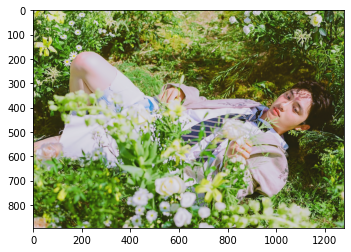

In [35]:
# Î≥∏Ïù∏Ïù¥ ÏÑ†ÌÉùÌïú Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°úÏóê ÎßûÍ≤å Î∞îÍøî Ï£ºÏÑ∏Ïöî.
# Ïù¥ÎØ∏ÏßÄÌååÏùº ÌôïÏû•ÏûêÎ™Ö Ï£ºÏùò‚ùó
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/Í≥µÍ∞ê.png'
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

DeepLab Î™®Îç∏ Ï§ÄÎπÑ

PixelLibÏóêÏÑú Ï†úÍ≥µÌï¥ Ï£ºÎäî Î™®Îç∏ÏùÑ Îã§Ïö¥Î°úÎìú

In [36]:
# Ï†ÄÏû•Ìï† ÌååÏùº Ïù¥Î¶ÑÏùÑ Í≤∞Ï†ïÌï©ÎãàÎã§
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLibÍ∞Ä Ï†úÍ≥µÌïòÎäî Î™®Îç∏Ïùò urlÏûÖÎãàÎã§
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# Îã§Ïö¥Î°úÎìúÎ•º ÏãúÏûëÌï©ÎãàÎã§
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fb0cfca2dc0>)

In [37]:
# Îã§Ïö¥Î°úÎìúÌïú Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìï¥ PixelLibÎ°ú ÏÇ¨Ïö©Ìï† ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò Î™®Îç∏ ÏÉùÏÑ±
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [38]:
# Î™®Îç∏ Ïù¥ÎØ∏ÏßÄ ÏûÖÎ†•
segvalues, output = model.segmentAsPascalvoc(img_path)

In [39]:
# PASCAL VOC Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤® Ï¢ÖÎ•ò
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

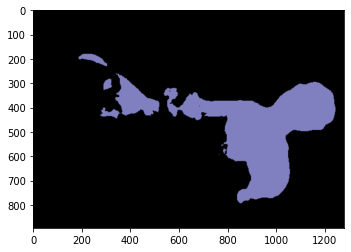

In [40]:
# Î™®Îç∏ÏóêÏÑú ÎÇòÏò® Ï∂úÎ†•Í∞í ÏÇ¥Ìé¥Î≥¥Í∏∞
plt.imshow(output)
plt.show()

In [41]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [42]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [43]:
# Î¨ºÏ≤¥ÎßàÎã§ outputÏóê Ïñ¥Îñ§ ÏÉâÏÉÅÏúºÎ°ú ÎÇòÌÉÄÎÇò ÏûàÎäîÏßÄ ÌôïÏù∏
# ÏïÑÎûò ÏΩîÎìúÎ•º Ïù¥Ìï¥ÌïòÏßÄ ÏïäÏïÑÎèÑ Ï¢ãÏäµÎãàÎã§
# PixelLibÏóêÏÑú Í∑∏ÎåÄÎ°ú Í∞ÄÏ†∏Ïò® ÏΩîÎìúÏûÖÎãàÎã§
# Ï£ºÎ™©Ìï¥Ïïº Ìï† Í≤ÉÏùÄ ÏÉùÏÉÅ ÏΩîÎìú Í≤∞Í≥ºÎ¨ºÏù¥ÏòàÏöî!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [44]:
# ÏÇ¨Îûå 15Î≤àÏß∏ ÏÉâÏÉÅ ÌôïÏù∏
colormap[15]

array([192, 128, 128])

In [45]:
seg_color = (128,128,192)

(895, 1280)


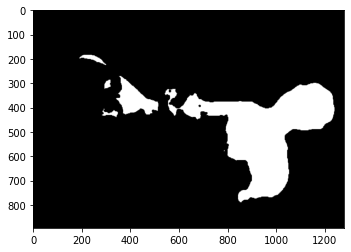

In [46]:
# seg_colorÎ°úÎßå Ïù¥Î£®Ïñ¥ÏßÑ ÎßàÏä§ÌÅ¨ ÎßåÎì§Í∏∞

# outputÏùò ÌîΩÏÖÄ Î≥ÑÎ°ú ÏÉâÏÉÅÏù¥ seg_colorÏôÄ Í∞ôÎã§Î©¥ 1(True), Îã§Î•¥Îã§Î©¥ 0(False)Ïù¥ Îê©ÎãàÎã§
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

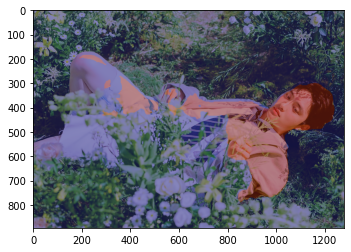

In [47]:
# ÏõêÎûò Ïù¥ÎØ∏ÏßÄÏôÄ Í≤πÏ≥êÏÑú ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖòÏù¥ ÏñºÎßàÎÇò Ïûò ÎêòÏóàÎäîÏßÄ ÌôïÏù∏
img_show = img_orig.copy()

# TrueÍ≥º FalseÏù∏ Í∞íÏùÑ Í∞ÅÍ∞Å 255Í≥º 0ÏúºÎ°ú Î∞îÍøîÏ§çÎãàÎã§
img_mask = seg_map.astype(np.uint8) * 255

# 255ÏôÄ 0ÏùÑ Ï†ÅÎãπÌïú ÏÉâÏÉÅÏúºÎ°ú Î∞îÍøîÎ¥ÖÎãàÎã§
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§Ìä∏Î•º Ï†ÅÎãπÌûà Ìï©Ï≥êÎ¥ÖÎãàÎã§
# 0.6Í≥º 0.4Îäî Îëê Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÎäî ÎπÑÏú®ÏûÖÎãàÎã§.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

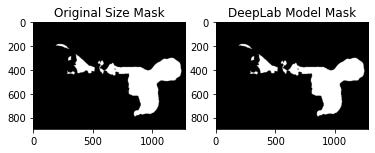

In [48]:
img_mask_up = cv2.resize(img_mask, img_orig.shape[:2][::-1], interpolation=cv2.INTER_LINEAR)
_, img_mask_up = cv2.threshold(img_mask_up, 128, 255, cv2.THRESH_BINARY)

ax = plt.subplot(1,2,1)
plt.imshow(img_mask_up, cmap=plt.cm.binary_r)
ax.set_title('Original Size Mask')

ax = plt.subplot(1,2,2)
plt.imshow(img_mask, cmap=plt.cm.binary_r)
ax.set_title('DeepLab Model Mask')

plt.show()

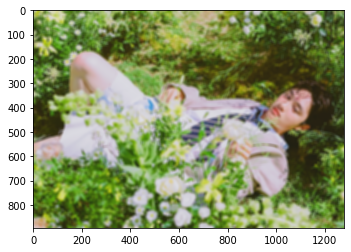

In [49]:
# Î∞∞Í≤Ω ÌùêÎ¶¨Í≤å ÎßåÎì§Í∏∞
# blur() Ìï®Ïàò Ïù¥Ïö©

# (13,13)ÏùÄ blurring kernel sizeÎ•º ÎúªÌï©ÎãàÎã§
# Îã§ÏñëÌïòÍ≤å Î∞îÍøîÎ≥¥ÏÑ∏Ïöî
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

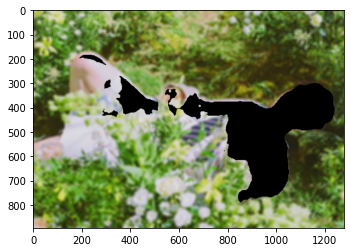

In [50]:
# ÌùêÎ†§ÏßÑ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨Î•º Ïù¥Ïö©Ìï¥ÏÑú Î∞∞Í≤ΩÎßå Ï∂îÏ∂ú
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# Î∞∞Í≤Ω ÏòÅÏÉÅÍ≥º ÏÇ¨Îûå ÏòÅÏÉÅ Ìï©ÏπòÍ∏∞

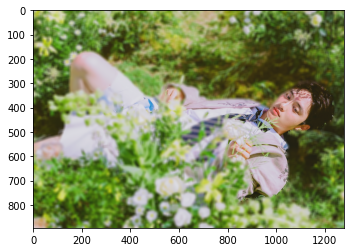

In [51]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

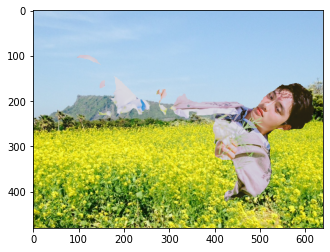

In [52]:
img_resized = cv2.resize(
    img_orig, (bacground_img_orig.shape[1], bacground_img_orig.shape[0]))
img_mask_resized = cv2.resize(
    img_mask_color, (bacground_img_orig.shape[1], bacground_img_orig.shape[0]))

img_background_concat = np.where(
    img_mask_resized == 255, img_resized, bacground_img_orig)

plt.imshow(cv2.cvtColor(img_background_concat, cv2.COLOR_BGR2RGB))
plt.show()

‚ñ∂‚ñ∂‚ñ∂ Î¨∏Ï†úÏ†ê : ÌïòÏ≤¥Î•º Î∞∞Í≤ΩÏúºÎ°ú Ïù∏ÏãùÌïòÍ≥† Î∞∞Í≤ΩÏ≤òÎ¶¨Í∞Ä ÎêòÏóàÎã§.(Ïú†Ï±ÑÍΩÉÎ∞≠ Ïù¥Î∂àÏùÑ ÎçÆÏùÄ Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.)

# [E-07] ÌöåÍ≥†

Ïù¥Î≤à explorationÏùÄ ÏÇ¨ÏßÑÏùÑ Îã§Î£®Îäî ÎÇ¥Ïö©Ïù¥Ïó¨ÏÑú ÌñâÎ≥µÌñàÏäµÎãàÎã§.ü•∞
Ï†ÄÎ≤àÏóê ÏÇ¨ÏßÑÏóê Ïä§Ìã∞Ïª§Î•º Î∂ôÏù¥Îäî explorationÎ•º ÌñàÏóàÏñ¥ÏÑú ÎÖ∏ÎìúÏùò ÎÇ¥Ïö©Ïù¥ Ï°∞Í∏à Îçî ÏâΩÍ≤å Ïûò Îì§Ïñ¥ÏôîÎçò Í≤É Í∞ôÏäµÎãàÎã§.

Î®ºÏ†Ä ÏÇ¨ÎûåÍ≥º Î∏îÎü¨Ï≤òÎ¶¨Îêú ÏÇ¨ÏßÑÏùÑ Ìï©ÏπòÎäî ÌååÌä∏Îäî ÏàòÏõîÌïòÍ≤å Ïûò ÎÑòÏñ¥Í∞îÏäµÎãàÎã§.
exploration 7Î≤à ÎÖ∏ÎìúÎßå Ïûò Îî∞ÎùºÍ∞ÄÎ©¥ ÎêòÎãàÍπåÏöî.

ÌïòÏßÄÎßå Í≥†ÏñëÏù¥ ÏÇ¨ÏßÑÍ≥º Î∞∞Í≤Ω ÌÅ¨Î°úÎßàÌÇ§Î•º ÌïòÎäîÎç∞ Ï°∞Í∏à ÎÇúÍ¥ÄÏù¥ ÏûàÏóàÎäîÎç∞Ïöî.

Í≥†ÏñëÏù¥ ÏÇ¨ÏßÑ ÌååÌä∏Î•º Ìï† Îïå mapcolorÎ•º ÌÜ†ÎåÄÎ°ú seg_colorÎ•º ÎΩëÏïòÏñ¥Ïïº ÌñàÎäîÎç∞, Ï†úÍ∞Ä ÎÖ∏ÎìúÏóêÏÑú Î¨∏Ïû•ÏùÑ ÏûòÎ™ª Ïù¥Ìï¥Ìï¥ÏÑú Ïò§Î•òÍ∞Ä ÎÇú Í≤ÉÏù¥ÏóàÏäµÎãàÎã§.

Í∑∏ÎûòÏÑú Í≥†ÏñëÏù¥ ÏΩîÎìúÏù∏ '8'ÏúºÎ°ú Í≥†Ï≥êÏ£ºÏûê Í≥†ÏñëÏù¥ ÏÇ¨ÏßÑÏù¥ Î∏îÎü¨Ï≤òÎ¶¨Í∞Ä ÎêòÏñ¥ÏÑú Ïûò ÎÇòÏôîÏäµÎãàÎã§.

Í∑∏Î¶¨Í≥† ÎåÄÎßùÏùò ÌÅ¨Î°úÎßàÌÇ§... ÌÅ¨Î°úÎßàÌÇ§Îäî Î∞∞Í≤ΩÏùÑ Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï¥Ïïº Ìï† ÏßÄ Î™∞ÎûêÎäîÎç∞, ÎÖ∏ÎìúÎ•º ÏûêÏÑ∏Ìûà Î≥¥Îãà Ï†úÍ∞Ä ÎßÅÌÅ¨Î•º ÌïòÎÇò ÎÜìÏ≥êÏÑú Î™ª Î≥∏ Í≤å ÏûàÎçîÎùºÍµ¨Ïöî„Öé

Í∑ºÎç∞ÎèÑ Î∞©Î≤ïÏùÑ Ïûò Î™∞ÎùºÏÑú Ï†úÍ∞Ä ÏûêÏ£º Ï∞∏Í≥†ÌïòÎäî ÍπÉÌóàÎ∏åÎ•º Ï∞∏Í≥†ÌñàÏäµÎãàÎã§.
https://github.com/JaeHeee/AIFFEL_Project/tree/master/EXPLORATION

Î∞∞Í≤ΩÏùÑ Ï†ïÏùòÌïòÍ≥† Í∞ÄÏ†∏Ïò§Îäî Î∞©Î≤ïÏùÑ Í∞ÄÏ†∏ÏôÄ ÏÇ¨Ïö©Ìï¥Î≥¥Îãà Ïûò ÎèåÏïÑÍ∞îÎäîÎç∞üòÇ
ÎßàÏßÄÎßâ ÏÇ¨ÏßÑÏùÑ Î≥¥ÏãúÎ©¥„Öé„Öé„Öé ÌïòÏ≤¥Î∂ÄÎ∂ÑÏùÑ ÏÇ¨ÎûåÏúºÎ°ú Ïù∏ÏãùÌïòÏßÄ Î™ª Ìï¥ÏÑú Ïú†Ï±ÑÍΩÉÎ∞≠ Ïù¥Î∂àÏùÑ ÎçÆÍ≥† ÏûàÎäî Î™®ÏäµÏù¥ ÎÇòÏòµÎãàÎã§.üòÖ

Ìï¥Í≤∞ÌïòÎäî ÍπÉÌóàÎ∏åÏóêÏÑúÎäî ÌîΩÏÖÄÏùÑ Ï°∞Í∏àÏî© ÏõÄÏßÅÏó¨ÏÑú ÎßàÏä§ÌÅ¨Î•º 3Í∞ú ÎßåÎì§Ïñ¥ Î∞∞Í≤ΩÍ≥º Ìï©ÏπòÎäî Î∞©Î≤ïÏùÑ ÎßêÌñàÎäîÎç∞, Ïù¥ Î∞©Î≤ïÏúºÎ°úÎäî Í≤ΩÏàò(ÏÇ¨ÏßÑÏÜç Ïù∏Î¨º Ïù¥Î¶Ñ)Í∞Ä Ïú†Ï±ÑÍΩÉÎ∞≠ Ïù¥Î∂àÏùÑ Î™ª Î≤óÍ≤†ÎçîÎùºÍµ¨Ïöî.

ÏßÄÍ∏àÏúºÎ°úÏç® Ï†úÍ∞Ä Ïñ¥ÎñªÍ≤å Î∞©Î≤ïÏùÑ Ïûò Î™ªÏ∞æÏïÑÏÑú Í≥ºÏ†úÎ•º Ï†úÏ∂úÌïòÍ≥† Îã§Î•∏ Î∂ÑÎì§ÏùÄ Ïñ¥ÎñªÍ≤å ÌïòÏÖ®ÎÇò Î¨ºÏñ¥Î≥¥Í≥† Ïò§ÎãµÎÖ∏Ìä∏Î•º Ìï† ÏòàÏ†ïÏûÖÎãàÎã§.üòÖü•∞